## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [2]:
pip install scikit-learn

In [8]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)

0.23.2


## 讀入資料

In [10]:
df_train = pd.read_csv("Titanic_train.csv")

In [11]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals, columns=['missing rates'])
print(missing_vals)

             missing rates
PassengerId       0.000000
Survived          0.000000
Pclass            0.000000
Name              0.000000
Sex               0.000000
Age               0.198653
SibSp             0.000000
Parch             0.000000
Ticket            0.000000
Fare              0.000000
Cabin             0.771044
Embarked          0.002245


In [13]:
#細看遺失值
missing_index = df_train.isnull()
display(df_train[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 觀察 Age

29.69911764705882
14.526497332334044


C:\Users\Boris\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


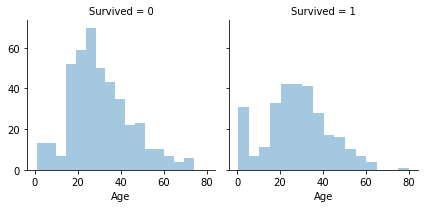

In [14]:
print(df_train['Age'].mean()) # age平均
print(df_train['Age'].std()) # age標準差

g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

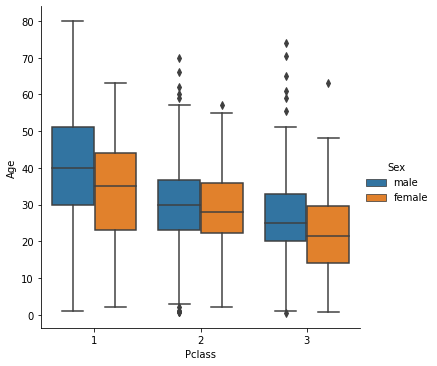

In [16]:
g = sns.catplot(x = 'Pclass', y = 'Age', hue = 'Sex', data = df_train, kind = 'box')

# 觀察到不同艙等的年紀不太相同

In [28]:
# sklearn中的 KNN只能處理數值型態
# 透過 preprocessing 轉型
from sklearn import preprocessing

# 讓 Male=1, Female=0

le = preprocessing.LabelEncoder()
df_train['Pclass'] = le.fit_transform(df_train['Pclass'])
df_train['Sex'] = le.fit_transform(df_train['Sex'])

data = df_train[['Age','Sex','Pclass']]
data1 = data.copy()

# KNN
# 設定用多少鄰居來補值
value_neighbors=1

from sklearn.impute import KNNImputer

# 初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)

# 把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data1))

# 只呈現有遺失值的資料
display(data1[missing_index.values==True])

# 呈現補值後的結果
display(df_filled[missing_index.values==True])

,Age,Sex,Pclass
0,22.0,1,2
2,26.0,0,2
4,35.0,1,2
5,NaN,1,2
5,NaN,1,2
...,...,...,...
885,39.0,0,2
886,27.0,1,1
888,NaN,0,2
888,NaN,0,2


,0,1,2
0,22.0,1.0,2.0
2,26.0,0.0,2.0
4,35.0,1.0,2.0
5,22.0,1.0,2.0
5,22.0,1.0,2.0
...,...,...,...
885,39.0,0.0,2.0
886,27.0,1.0,1.0
888,26.0,0.0,2.0
888,26.0,0.0,2.0


# 用K=3試試看

In [31]:
data2 = data.copy()
# KNN
# 設定用多少鄰居來補值
value_neighbors=3

from sklearn.impute import KNNImputer

# 初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)

# 把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data2))

# 只呈現有遺失值的資料
display(data2[missing_index.values==True])

# 呈現補值後的結果
display(df_filled[missing_index.values==True])

#發現鄰居數目增加(k變大)時，年齡補值變小了

,Age,Sex,Pclass
0,22.0,1,2
2,26.0,0,2
4,35.0,1,2
5,NaN,1,2
5,NaN,1,2
...,...,...,...
885,39.0,0,2
886,27.0,1,1
888,NaN,0,2
888,NaN,0,2


,0,1,2
0,22.000000,1.0,2.0
2,26.000000,0.0,2.0
4,35.000000,1.0,2.0
5,19.666667,1.0,2.0
5,19.666667,1.0,2.0
...,...,...,...
885,39.000000,0.0,2.0
886,27.000000,1.0,1.0
888,19.000000,0.0,2.0
888,19.000000,0.0,2.0


# 透過MSE計算來觀察K=1和K=3補值效果的差異

In [32]:
from sklearn.metrics import mean_squared_error

# Step1:取無遺失值的資料集
import random
completet_data=data.dropna()
#重置 index
completet_data=completet_data.reset_index(drop=True)
display(completet_data)

,Age,Sex,Pclass
0,22.0,1,2
1,38.0,0,0
2,26.0,0,2
3,35.0,0,0
4,35.0,1,2
...,...,...,...
709,39.0,0,2
710,27.0,1,1
711,19.0,0,0
712,26.0,1,0


In [45]:
# Step2:隨機取 15 個資料點，當作遺失值
a = random.sample(list(completet_data.index),15) 
missing_data=completet_data.copy()
missing_data['Age'].iloc[a]=np.nan

display(missing_data.iloc[a])

C:\Users\Boris\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Sex,Pclass
210,NaN,1,2
577,NaN,1,2
650,NaN,0,2
520,NaN,1,0
632,NaN,1,1
399,NaN,0,2
319,NaN,1,1
330,NaN,1,2
80,NaN,1,2
250,NaN,1,2


# 對K=1補值計算MSE

In [44]:
# Step3:以 Step2產生的遺失值進行補值
k = 1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k, add_indicator = True)
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Age', 1:'Sex', 2:'Pclass',3:'imputer.Age'}, inplace = True)

# 判斷 df_filled 和 data 的距離
# Step4: 計算MSE看補值的效果。
from sklearn.metrics import mean_squared_error
y1 = completet_data['Age']
y2 = verify_impute['Age'] 
MSE_h = mean_squared_error(y1,y2)
print(MSE_h)

3.6204481792717087


# 對K=3補值計算MSE

In [46]:
k = 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k, add_indicator = True)
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Age', 1:'Sex', 2:'Pclass',3:'imputer.Age'}, inplace = True)

# 判斷 df_filled 和 data 的距離
# Step4: 計算MSE看補值的效果。
from sklearn.metrics import mean_squared_error
y1 = completet_data['Age']
y2 = verify_impute['Age'] 
MSE_h = mean_squared_error(y1,y2)
print(MSE_h)

4.202147525676938


In [ ]:
# 結果發現 k=1時的 MSE比 k=3 還來的小
# 代表在透過 KNN的方式以 Sex 與 Pclass 補 Age 遺失值時，用 k=1來補值較為準確